# 05 · Evaluate & Visualize YOLOv8 (Ultralytics)

Load the best YOLOv8 checkpoint saved by the Ultralytics training notebook, evaluate it on the PCB defect dataset splits, and visualize random predictions.


In [ ]:
# %pip install -q --upgrade ultralytics torch torchvision torchaudio matplotlib


In [1]:
import random
from pathlib import Path

import matplotlib.pyplot as plt
import torch
from ultralytics import YOLO
%matplotlib inline


In [2]:
DATA_ROOT = Path("../PCB_DATASET/yolo_dataset").resolve()
DATA_YAML = DATA_ROOT / "data.yaml"
PROJECT_DIR = Path("../artifacts/ultralytics").resolve()
RUN_NAME = "pcb_yolov8_s"
BEST_WEIGHTS = PROJECT_DIR / RUN_NAME / "weights" / "best.pt"
DEVICE = 0 if torch.cuda.is_available() else "cpu"
IMAGE_SIZE = 640
CONF_THRESHOLD = 0.25

print(f"Using weights: {BEST_WEIGHTS}")
assert BEST_WEIGHTS.exists(), "Run the training notebook first to create best.pt"
print(f"CUDA available: {torch.cuda.is_available()}")


Using weights: E:\infosys_springboard\artifacts\ultralytics\pcb_yolov8_s\weights\best.pt
CUDA available: True


In [3]:
model = YOLO(str(BEST_WEIGHTS))
model.to(DEVICE)
model

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(96, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(64, eps=0.001, momentum=0.03, affine=True, track_running_s

In [5]:
val_metrics = model.val(data=str(DATA_YAML), split="val", imgsz=IMAGE_SIZE, device=DEVICE)
val_metrics


Ultralytics 8.3.233  Python-3.12.0 torch-2.8.0.dev20250609+cu126 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
val: Fast image access  (ping: 0.10.0 ms, read: 80.910.6 MB/s, size: 1441.9 KB)
val: Scanning E:\infosys_springboard\PCB_DATASET\yolo_dataset\labels\val... 138 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 138/138 382.8it/s 0.4s0.1s
val: New cache created: E:\infosys_springboard\PCB_DATASET\yolo_dataset\labels\val.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 9/9 1.2s/it 11.1s0.6s
                   all        138        598      0.941      0.924      0.951      0.522
          Missing_hole         23        100      0.982       0.99      0.981      0.617
            Mouse_bite         23        102       0.93      0.906      0.953      0.504
          Open_circuit         23         96      0.947      0.936      0.967      0.505
                 Short         23         97      0.935       0.99  

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001CE3187C200>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
 

In [6]:
def visualize_predictions(split="test", count=6):
    sample_dir = DATA_ROOT / "images" / split
    images = random.sample(list(sample_dir.glob("*.jpg")), k=count)
    preds = model.predict(source=[str(p) for p in images], imgsz=IMAGE_SIZE, conf=CONF_THRESHOLD, device=DEVICE, save=False)
    cols = 3
    rows = (len(preds) + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
    axes = axes.flatten()
    for ax, pred in zip(axes, preds):
        ax.imshow(pred.plot(show=False))
        ax.set_title(Path(pred.path).name)
        ax.axis("off")
    for ax in axes[len(preds):]:
        ax.axis("off")
    fig.suptitle(f"{split} predictions", fontsize=16)
    plt.tight_layout()
    plt.show()



0: 640x640 5 Shorts, 45.2ms
1: 640x640 4 Shorts, 45.2ms
2: 640x640 5 Missing_holes, 45.2ms
3: 640x640 5 Spurious_coppers, 45.2ms
4: 640x640 4 Spurs, 45.2ms
5: 640x640 5 Spurs, 45.2ms
Speed: 7.1ms preprocess, 45.2ms inference, 3.7ms postprocess per image at shape (1, 3, 640, 640)


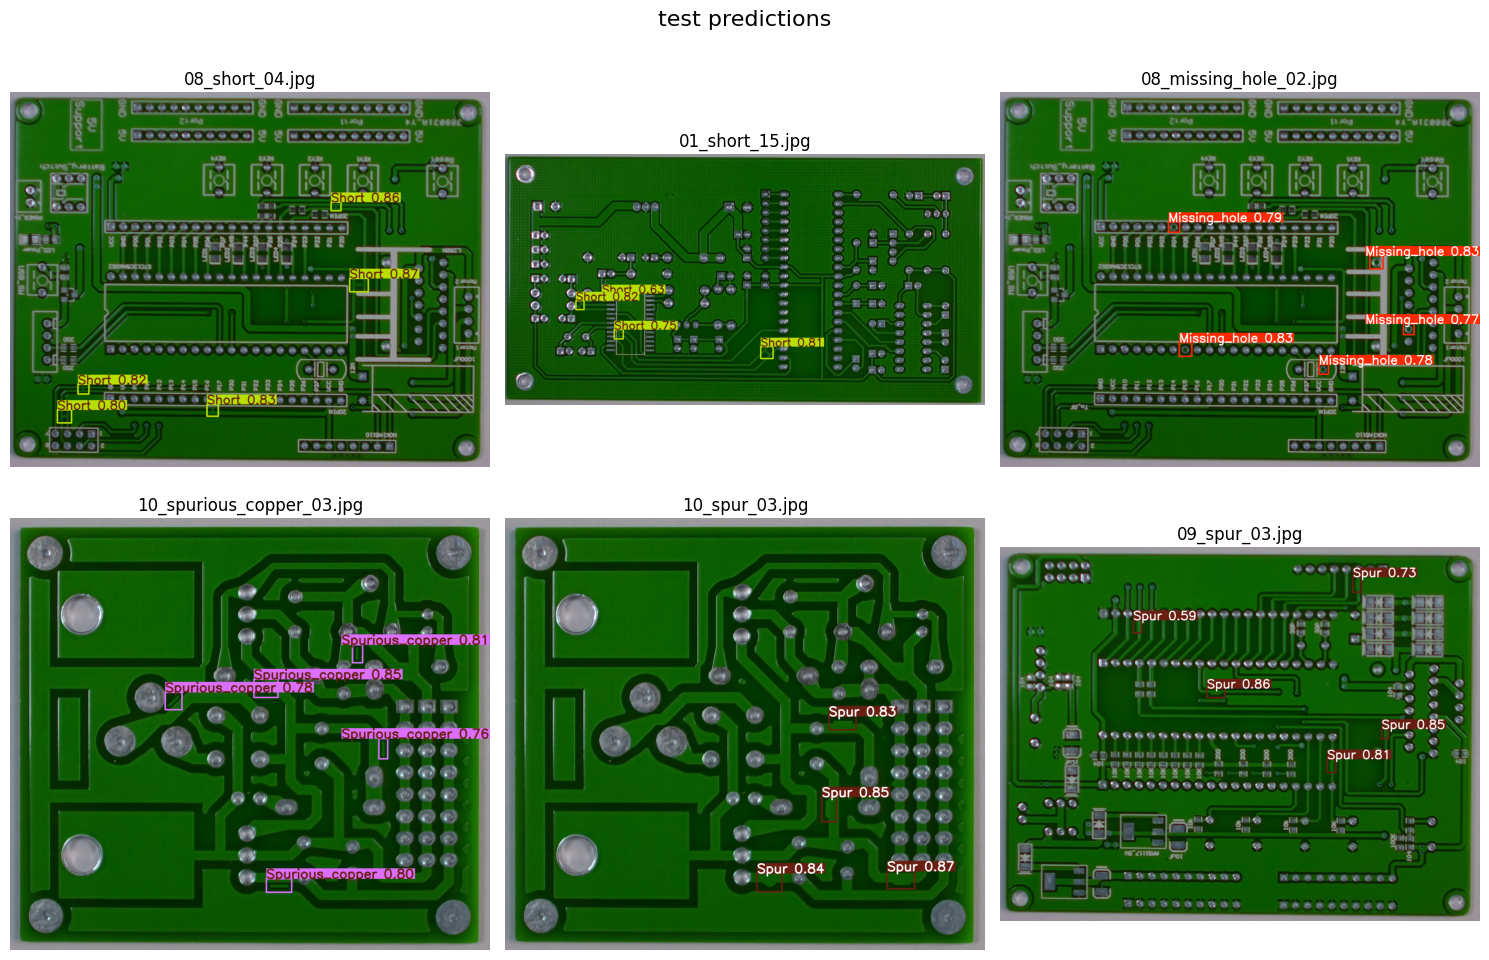

In [8]:
visualize_predictions(split="test", count=6)